<a href="https://colab.research.google.com/github/abhiramangit/CNN_Exercises/blob/master/CNN_Tutorials_%26_CIFAR_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# DATA LOADING

In [0]:
import torchvision        
import torchvision.transforms as transforms

In [0]:
## transforms.ToTensor converts PIL image to torchTensor data 
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
#print(trainset)
print(type(trainset))

Extracting ./data/cifar-10-python.tar.gz to ./data
<class 'torchvision.datasets.cifar.CIFAR10'>


In [0]:
classes = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [0]:
trainloader11 = torch.utils.data.DataLoader(dataset=trainset,batch_size=4,shuffle=True)
print(type(trainloader11))

<class 'torch.utils.data.dataloader.DataLoader'>


In [0]:
dataiter = iter(trainloader11)
images,labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
4


# Visualizing Data

In [0]:
## Convert a single image of Batch of image from Torch Tensor to Numpy
img_converted = images[0].numpy()
print(img_converted.shape)

(3, 32, 32)


In [0]:
## Transpose the Matrix from 4x3x32x32 to 32x32x3x4, where 32x32 refers to 2-D pixel data , 3 refers to Color image gaving 'RGB' data , 4 refers to batch size 
img_converted_transpose = np.transpose(img_converted,[2,1,0])
print(img_converted_transpose.shape)
print(len(img_converted_transpose.shape))

(32, 32, 3)
3


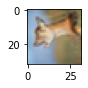

In [0]:
## Show Image on Matplotlib using imshow
plt.figure(figsize=(1,1))
plt.imshow(img_converted_transpose)
plt.show()

In [0]:
## Above steps for visulization as a function
def image_show(img):
  img_np = img.numpy()
  img_np_transpose = np.transpose(img_np,(1,2,0))  
  plt.imshow(img_np_transpose)
  plt.show()

torch.Size([3, 32, 32])


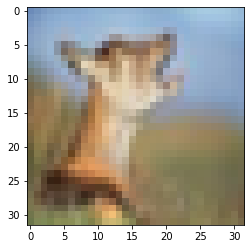

In [0]:
print(images[0].shape)
image_show(images[0])

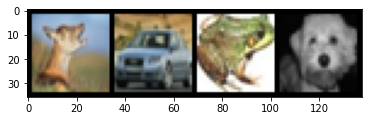

     deer   automobile   frog   dog


In [0]:
## We can see all the images in a batch in a single grid
image_show(torchvision.utils.make_grid(images))
print(' ','  ','   '.join(classes[labels[j]] for j in range(4)))

# CNN Using Torch.nn Module



In [0]:
import torch.nn as nn

VERSION 1: Single Layer Network

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,16,3)

  def forward(self,x):
    x = self.conv1(x)
    return x 

In [0]:
net = FirstCNN()

In [0]:
print(dir(net))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_buffers', '_forward_hooks', '_forward_pre_hooks', '_get_name', '_load_from_state_dict', '_load_state_dict_pre_hooks', '_modules', '_named_members', '_parameters', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_state_dict_hooks', '_version', 'add_module', 'apply', 'bfloat16', 'buffers', 'children', 'conv1', 'cpu', 'cuda', 'double', 'dump_patches', 'eval', 'extra_repr', 'float', 'forward', 'half', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules', 'named

In [0]:
output = net(images)
print(output.shape)

torch.Size([4, 16, 30, 30])


In [0]:
for params in net.parameters():
  print(params.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


(30, 30)


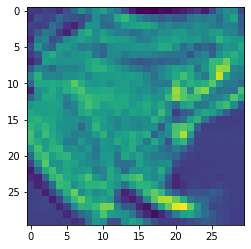

In [0]:
image_post_conv = output[2][9].detach().numpy()
print(image_post_conv.shape)
plt.imshow(image_post_conv)

Version 2: 2 Layer Network

In [0]:
class CNN_V2(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3),      ## (N,3,32,32)->(N,8,30,30)
        nn.Conv2d(8,16,3)     ## (N,8,30,30)->(N,16,28,28)
    )

  def forward(self,x):
    x = self.model(x)
    return x


In [0]:
net_v2 = CNN_V2()


In [0]:
output = net_v2(images)
print(output.shape)

torch.Size([4, 16, 28, 28])


(28, 28)


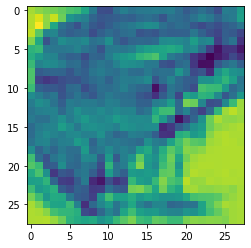

In [0]:
image_post_conv = output[2,0,:,:].detach().numpy()
print(image_post_conv.shape)
plt.imshow(image_post_conv)

In [0]:
class CNN_V3(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,5),     ## (N,3,32,32) -> (N,8,28,28)
        nn.AvgPool2d(2,2),    ## (N,8,28,28) -> (N,8,14,14)
        nn.Conv2d(8,16,5),    ## (N,8,14,14) -> (N,16,10,10)
        nn.AvgPool2d(2,2)     ## (N,16,5,5)
    )

  def forward(self,x):
    x = self.model(x)
    return x

In [0]:
net_3 = CNN_V3()
output_3 = net_3(images)
print(output_3.shape)

torch.Size([4, 16, 5, 5])


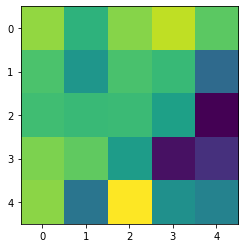

In [0]:
image_post_conv = output_3[2,0,:,:].detach().numpy()
plt.imshow(image_post_conv)

# LeNet CNN

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.CNN_Model = nn.Sequential(
        nn.Conv2d(3,6,5),     ## (N,3,32,32) -> (N,6,28,28)
        nn.Tanh(),            ## (N,6,28,28)
        nn.AvgPool2d(2,stride=2),    ##(N,6,14,14)
        nn.Conv2d(6,16,5),    ## (N,6,14,14)->(N,16,10,10)
        nn.Tanh(),   ## (N,16,10,10)
        nn.AvgPool2d(2,stride=2)    ##(N,16,5,5)
    )

    self.Fully_Connected_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )

  def forward(self,X):
    cnn_model = self.CNN_Model(X)
    #print(cnn_model.shape)
    flat_inputs = cnn_model.view(cnn_model.shape[0],-1)
    #print(flat_inputs.shape)
    output = self.Fully_Connected_model(flat_inputs)
    return output

In [0]:
le_net = LeNet().to(device)

In [0]:
out = le_net(images.to(device))
print(out)

In [0]:
Max_values,Class_index = torch.max(out.data,1)
print(Max_values)
print(Class_index )

In [0]:
batch_size = 128
train_set = torchvision.datasets.CIFAR10('./data',train=True,transform=transforms.ToTensor(),download=True)
train_set_loader = torch.utils.data.DataLoader(train_set,batch_size,shuffle=True)
print(train_set_loader)
test_set = torchvision.datasets.CIFAR10('./data',train=False,download=True,transform=transforms.ToTensor())
test_set_loader = torch.utils.data.DataLoader(test_set,batch_size,shuffle=False)

In [0]:
def Evaluate(data_loader):
  correct,total = 0,0
  for data in data_loader:
    images,labels = data
    images,labels = images.to(device),labels.to(device)
    
    outputs = le_net(images)
    _,class_pred = torch.max(outputs,1)
    total+= outputs.shape[0]
    correct+=(class_pred==labels).sum().item()
  accuracy = (correct*100)/total
  return accuracy
  


In [0]:
train_accuracy=Evaluate(train_set_loader)
print(train_accuracy)

In [0]:
from torch import optim
loss_fn = nn.CrossEntropyLoss()
learn_algorithm = optim.Adam(le_net.parameters())

In [0]:
%%time
loss_arrr = []
loss_epoch_arr = []
max_epochs = 20
for epoch in range(max_epochs):
  for i,data in enumerate(train_set_loader):
    ## FOr each batchsize 
    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = le_net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    learn_algorithm.step()
    learn_algorithm.zero_grad()
    

    loss_arrr.append(loss.item())

  loss_epoch_arr.append(loss.item())

  print('Epoch {}/{},Train_Accuracy:{},Test_Accuracy:{}'.format(epoch,max_epochs,Evaluate(train_set_loader),Evaluate(test_set_loader)))

plt.plot(loss_epoch_arr)
plt.show()



In [0]:
def predict_classes(train_set_loader):
  for i,data in enumerate(train_set_loader):
    if i ==0:
      inputs,labels = data
      inputs,labels = inputs.to(device),labels.to(device)
      outputs = le_net(inputs)
      class_name = torch.max(outputs,dim=1)[1].to("cpu").numpy()
      class_name = [classes[val] for val in class_name]

      inputs = inputs.to("cpu")
    return class_name,inputs
  


In [0]:
def plot_image_and_class(batch_size,train_set_loader):
  rows = 16
  columns = batch_size/rows
  classes_names_pred , inputs_images = predict_classes(train_set_loader)
  fig = plt.figure(figsize=(50,50))
  fig.subplots_adjust(hspace=0.1,wspace=0.1)  
  
  for i,img in enumerate(inputs_images):
    
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(img.numpy().transpose(2,1,0))
    plt.title(classes_names_pred[i])
  plt.show()


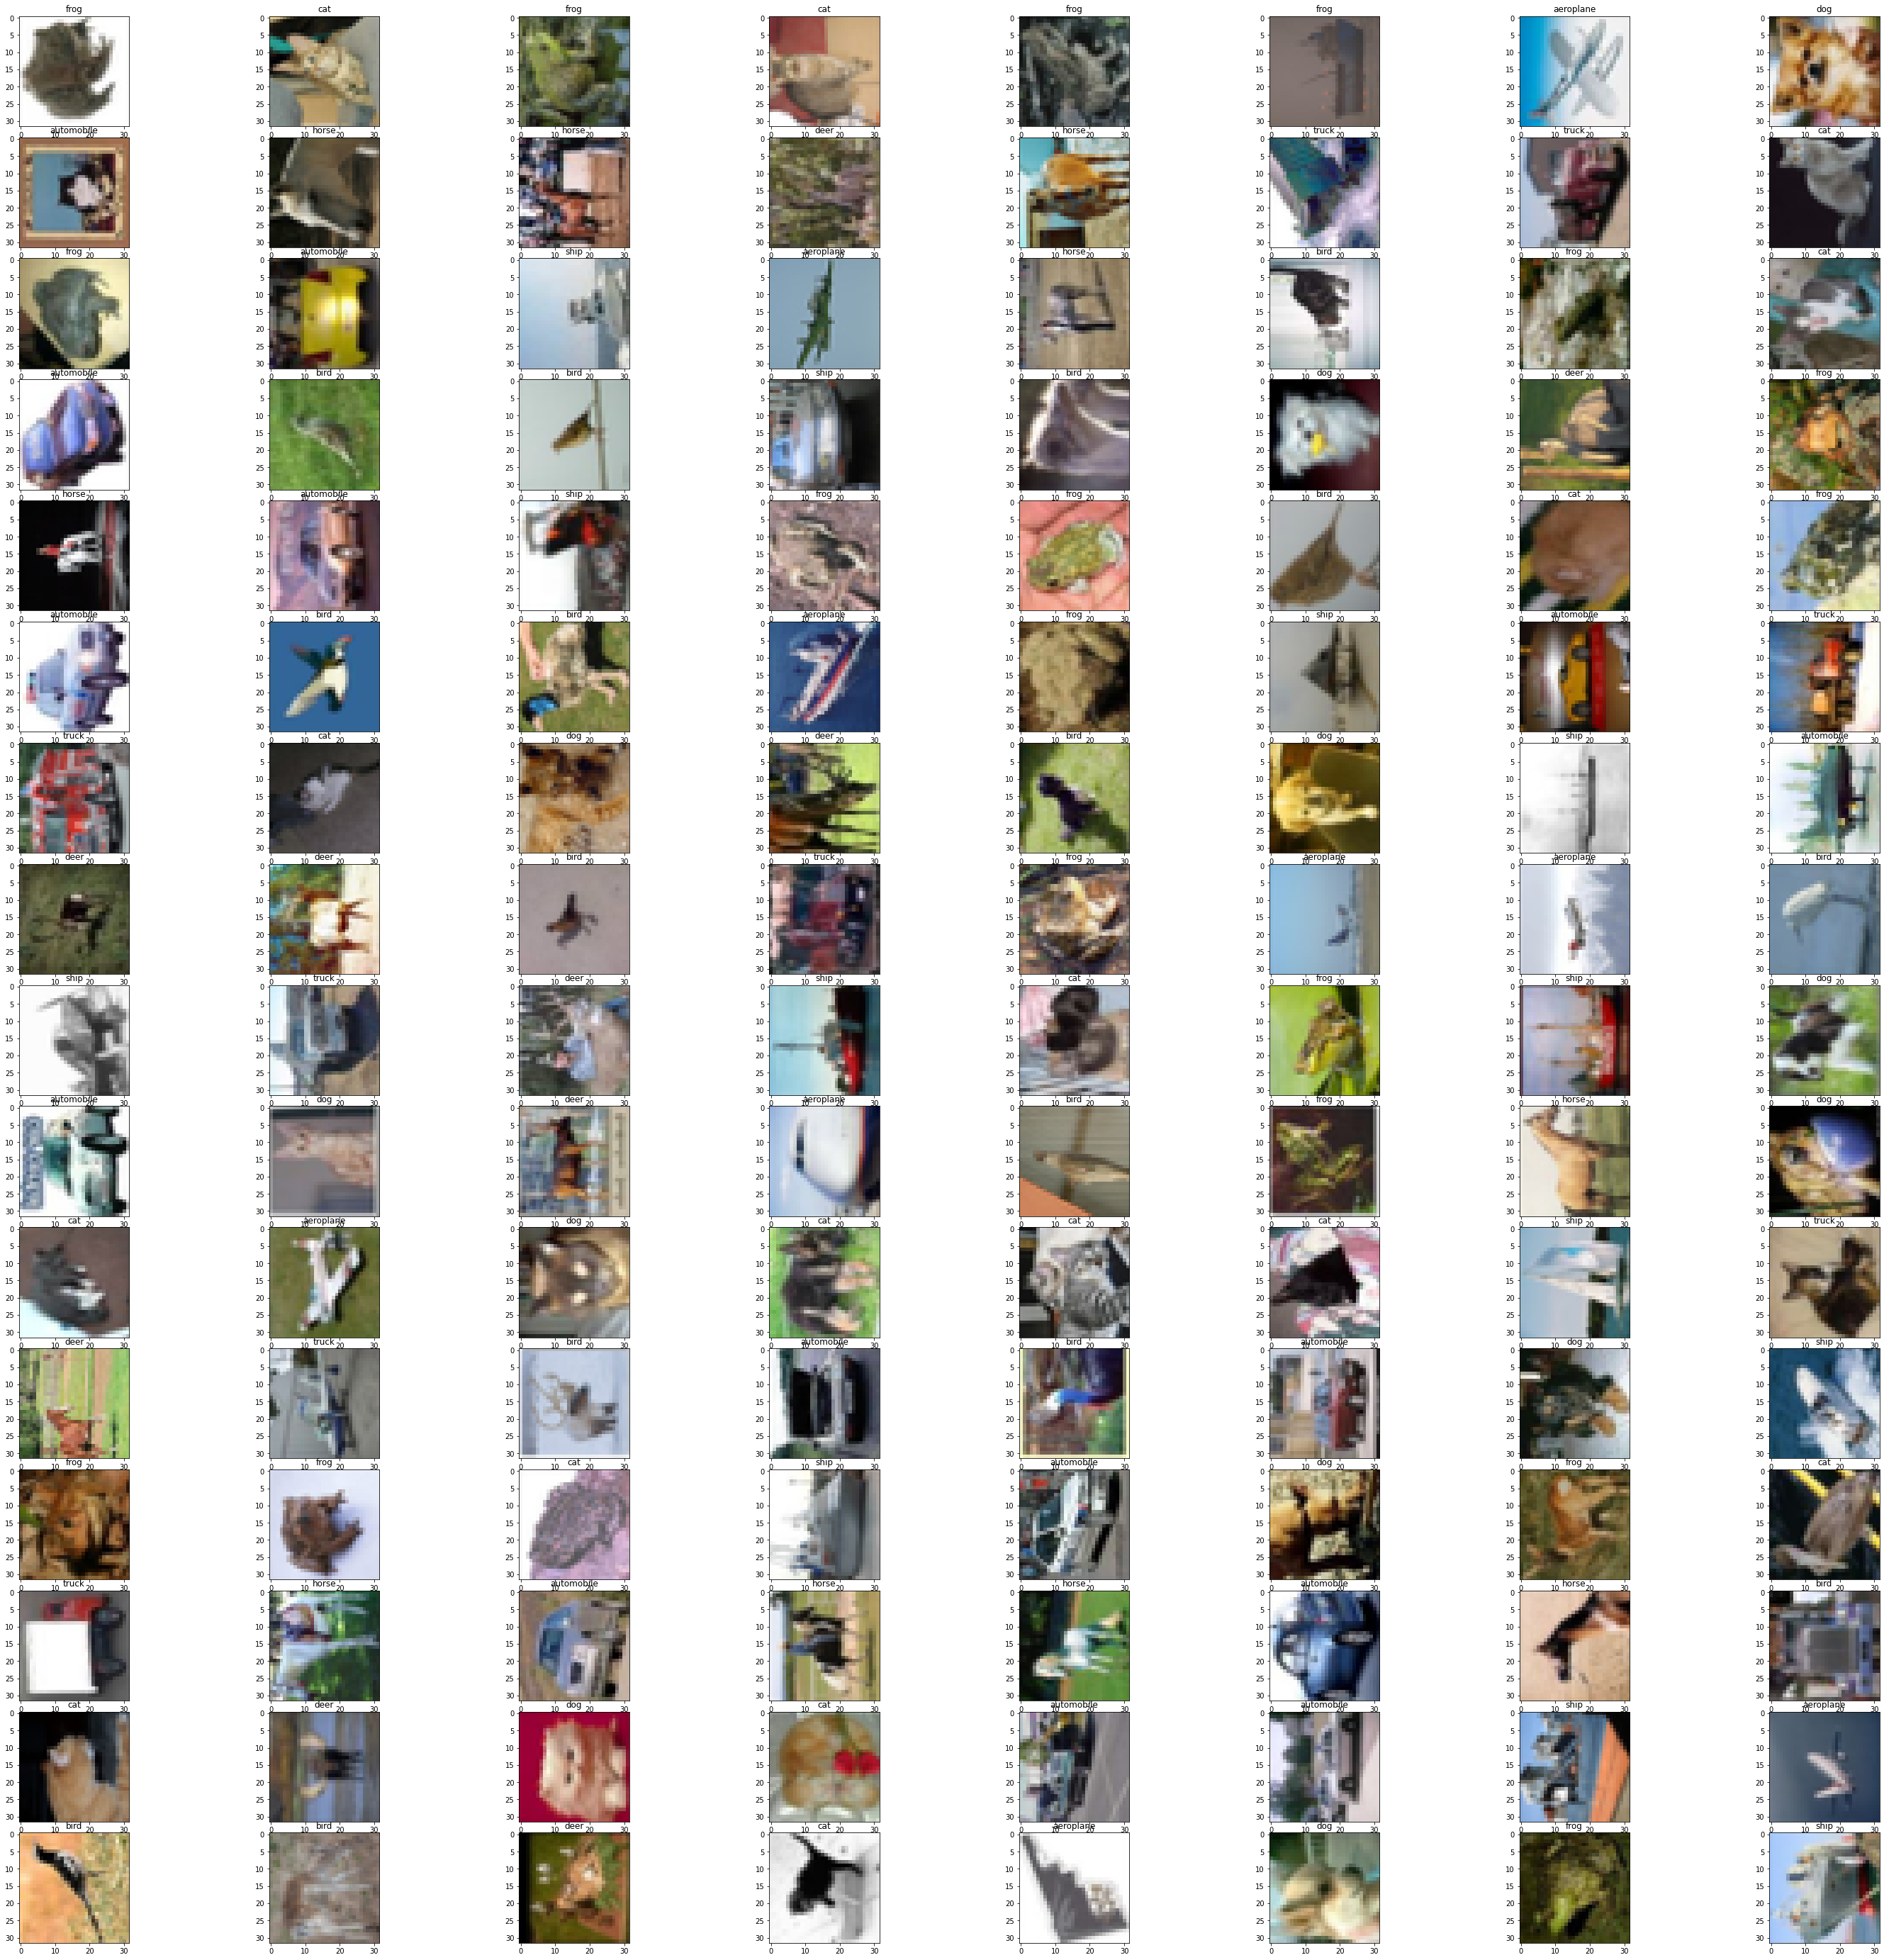

In [0]:
plot_image_and_class(batch_size,train_set_loader)

# Visualising Intermediate Layers

In [0]:
data_iter = iter(trainloader11)
image111,label = data_iter.next()

print(image111.shape)
print(label.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4])


In [0]:
le_net = le_net.to("cpu")

In [0]:
out = le_net(image111)
print(out.shape)

torch.Size([4, 10])


In [0]:
out1 = le_net.CNN_Model[0](image111)
print(out1.shape)
out2 = le_net.CNN_Model[2](out1)
print(out2.shape)
out3 = le_net.CNN_Model[3](out2)
print(out3.shape)


torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


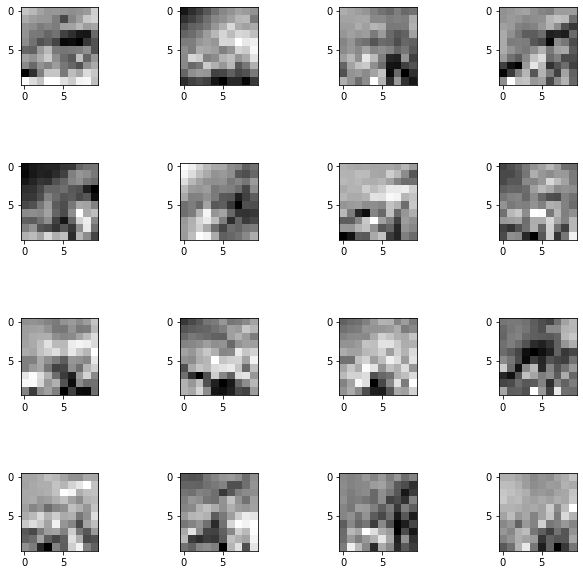

In [0]:
fig = plt.figure(figsize=(10,10))
plt.subplot(441)
fig.subplots_adjust(hspace=1,wspace=1)
for i in range(16):
  fig.add_subplot(4,4,i+1) 
  plt.imshow(out3[2,i,:,:].detach().numpy(),cmap='binary')
plt.show()